In [52]:
import requests

import pandas as pd
import matplotlib.pyplot as plt

from Historic_Crypto import HistoricalData

# Fear and Greed Index API

Free API that provides one index per day.

`'time_until_update'` value - present only for the last output 

In [41]:
url = 'https://api.alternative.me/fng/'
params = {'limit': 100000,
          'date_format': 'world'
         }
response = requests.get(url, params).json()
response

{'name': 'Fear and Greed Index',
 'data': [{'value': '50',
   'value_classification': 'Neutral',
   'timestamp': '23-01-2023',
   'time_until_update': '-1674417382'},
  {'value': '53',
   'value_classification': 'Neutral',
   'timestamp': '22-01-2023'},
  {'value': '53',
   'value_classification': 'Neutral',
   'timestamp': '21-01-2023'},
  {'value': '51',
   'value_classification': 'Neutral',
   'timestamp': '20-01-2023'},
  {'value': '45', 'value_classification': 'Fear', 'timestamp': '19-01-2023'},
  {'value': '52',
   'value_classification': 'Neutral',
   'timestamp': '18-01-2023'},
  {'value': '51',
   'value_classification': 'Neutral',
   'timestamp': '17-01-2023'},
  {'value': '45', 'value_classification': 'Fear', 'timestamp': '16-01-2023'},
  {'value': '52',
   'value_classification': 'Neutral',
   'timestamp': '15-01-2023'},
  {'value': '46', 'value_classification': 'Fear', 'timestamp': '14-01-2023'},
  {'value': '31', 'value_classification': 'Fear', 'timestamp': '13-01-2023'},

In [42]:
fng_df = pd.DataFrame(response['data']).drop(columns='time_until_update')
fng_df

,value,value_classification,timestamp
0,50,Neutral,23-01-2023
1,53,Neutral,22-01-2023
2,53,Neutral,21-01-2023
3,51,Neutral,20-01-2023
4,45,Fear,19-01-2023
...,...,...,...
1810,11,Extreme Fear,05-02-2018
1811,24,Extreme Fear,04-02-2018
1812,40,Fear,03-02-2018
1813,15,Extreme Fear,02-02-2018


In [43]:
fng_df.timestamp = pd.to_datetime(fng_df.timestamp, format='%d-%m-%Y')
fng_df.set_index('timestamp', inplace=True)

In [44]:
fng_df.value = fng_df.value.astype('float')

In [45]:
fng_df.head()

,value,value_classification
timestamp,,
2023-01-23,50.0,Neutral
2023-01-22,53.0,Neutral
2023-01-21,53.0,Neutral
2023-01-20,51.0,Neutral
2023-01-19,45.0,Fear


In [46]:
fng_df.dtypes

value                   float64
value_classification     object
dtype: object

<Figure size 1800x1200 with 0 Axes>

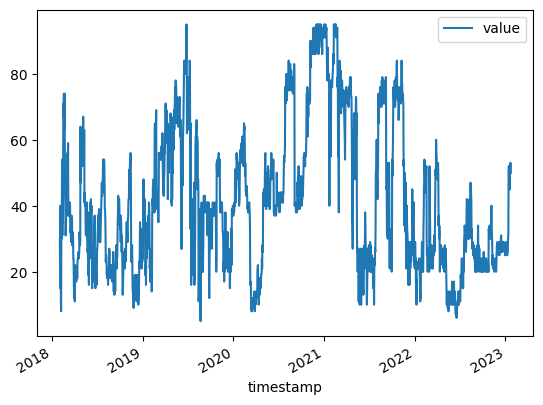

In [49]:
fng_df.plot(y='value', use_index=True);

# Historical data

In [53]:
new = HistoricalData('ETH-USD',86400,'2022-06-01-00-00','2022-06-01-00-03',verbose = False).retrieve_data()

In [54]:
new

,low,high,open,close,volume
time,,,,,
2022-06-01,1761.59,1972.5,1940.49,1816.05,266690.7085
